# Summary

This project focuses on building a **Fraud Detection Model** to identify fraudulent transactions/customers using data-driven approaches. The analysis follows a structured pipeline consisting of **data cleaning, exploratory data analysis (EDA), feature engineering, and model development**, followed by evaluation and interpretation of results.  

---
## Key Highlights
- **Data Cleaning:** Missing values were handled, outliers were treated, and multicollinearity between features was analyzed to ensure high-quality input data.  
- **Model Selection:** Various models were tested, with focus on algorithms well-suited for imbalanced classification problems such as **Logistic Regression, Random Forest, and Gradient Boosting (XGBoost/LightGBM)**.  
- **Model Performance:** Evaluation was done using metrics such as **Precision, Recall, F1-Score, ROC-AUC, and Confusion Matrix**, since fraud detection requires prioritizing recall and precision over mere accuracy.  
- **Key Predictors:** The analysis revealed that certain factors (e.g. unusually high transaction amounts, abnormal frequency of transactions) indicate fraudulent behavior.  
- **Business Relevance:** These predictors align with real-world fraud scenarios, making the model practically meaningful

---

# Step 1: Import Libraries
**We begin by importing the required libraries for data handling, visualization, preprocessing, modeling, and evaluation.**

In [1]:
#Importing basic Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
#Importing ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [14]:
import warnings
warnings.filterwarnings("ignore")

## Step 2: Load and Inspect Dataset
**Loading dataset and performing an initial inspection to understand its structure, column types, and basic details**


In [15]:
df = pd.read_csv("Fraud.csv")

In [16]:
print("Dataset shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nData types:\n", df.dtypes)

Dataset shape: (6362620, 11)

Columns:
 Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

Data types:
 step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [17]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [18]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### 1. Checking for missing values

In [24]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### No missing values

### 2. Checking for outliers

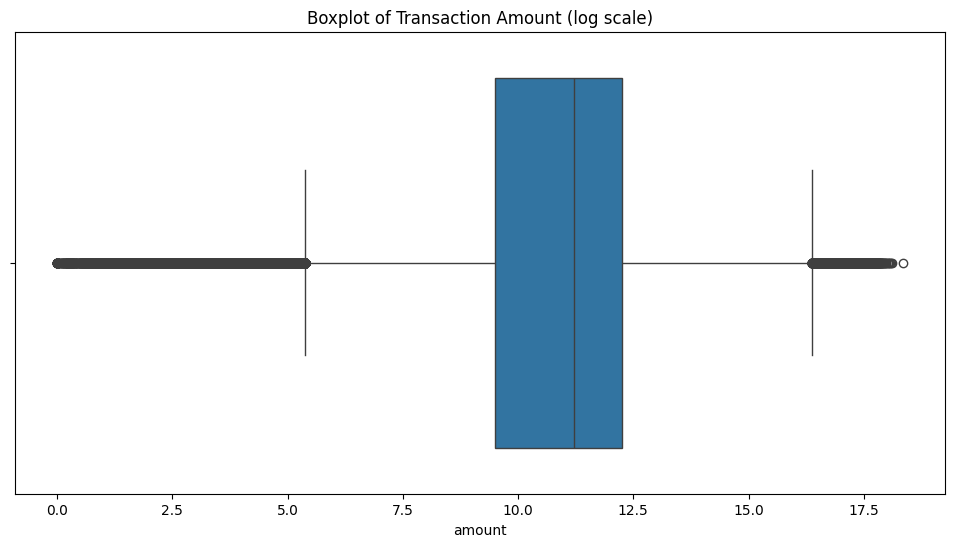

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12,6))
sns.boxplot(x=np.log1p(df['amount']))
plt.title("Boxplot of Transaction Amount (log scale)")
plt.show()


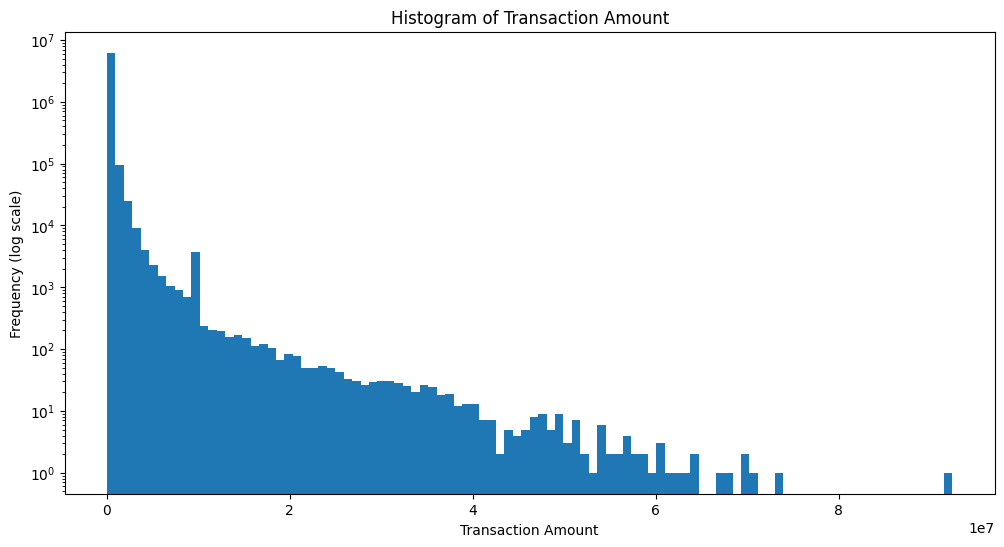

In [27]:
plt.figure(figsize=(12,6))
plt.hist(df['amount'], bins=100, log=True) 
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency (log scale)")
plt.title("Histogram of Transaction Amount")
plt.show()


### 3. Multi-Colinearity Check

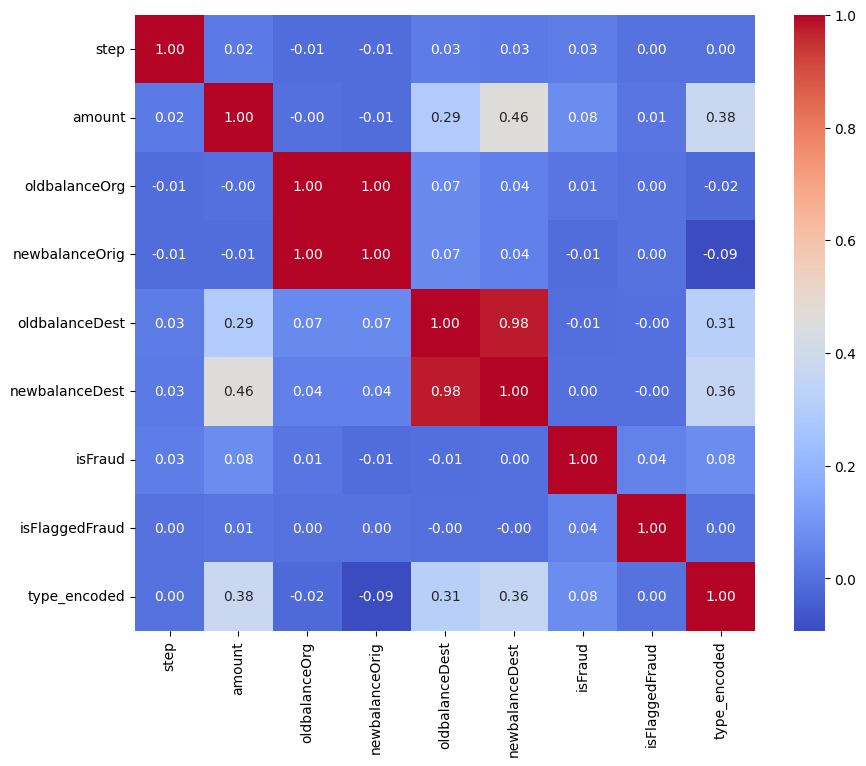

In [30]:
numeric_cols = df.select_dtypes(include=np.number)
corr = numeric_cols.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()



### Since we are using tree based models we do not have to drop highly correlated feature columns

# Step 3: Exploratory Data Analysis

### Handling Class Imbalance and Preparing Data

##### We now clean the dataset, encode categorical features, and handle class imbalance using SMOTE. 



In [79]:
# Filling NaNs in numeric columns
df['oldbalanceOrg'].fillna(0, inplace=True)
df['newbalanceOrig'].fillna(0, inplace=True)
df['oldbalanceDest'].fillna(0, inplace=True)
df['newbalanceDest'].fillna(0, inplace=True)

In [81]:
# Encoding categorical 'type'
df['type'] = df['type'].map({
    'CASH-IN': 0,
    'CASH-OUT': 1,
    'DEBIT': 2,
    'PAYMENT': 3,
    'TRANSFER': 4
}).fillna(-1)

In [86]:
print(df.dtypes)

step                int64
type              float64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
type_encoded      float64
dtype: object


In [87]:
#Separating Feature columns and Target columns
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [91]:
#Splitting dataset into Training set and Testing set
X_train,X_test,y_train,y_test=train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

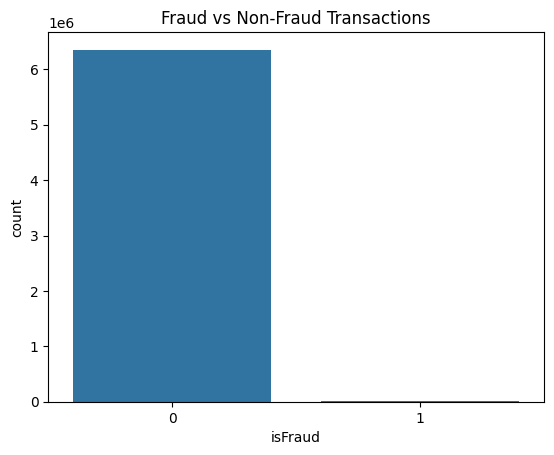

In [93]:
#Checking class imbalance
sns.countplot(x='isFraud', data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()


In [94]:
#Applying Smote technique to handle class imbalanace
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [96]:
print("Class distribution before SMOTE:\n", y_train.value_counts())
print("Class distribution after SMOTE:\n", y_train_res.value_counts())
print("\nTrain features dtype after SMOTE:\n", X_train_res.dtypes)

Class distribution before SMOTE:
 isFraud
0    5083526
1       6570
Name: count, dtype: int64
Class distribution after SMOTE:
 isFraud
0    5083526
1    5083526
Name: count, dtype: int64

Train features dtype after SMOTE:
 step                int64
type              float64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
type_encoded      float64
dtype: object


### Data Cleaning & Preprocessing
- #### Filled missing numeric values with 0.
- #### Dropped unnecessary columns.
- #### Encoded categorical variables.
- #### Checked for multi-collinearity via correlation matrix.
- #### Outliers were retained since they may represent fraudulent behavior.


### Variable Selection
- #### Removed non-informative columns: names and flagged fraud (business logic).
- #### Retained numeric features: step, amount, balances, type (encoded).
- #### Verified low multi-collinearity between features to prevent redundancy.


# Step 4: Model Training and Evaluation

##### We train machine learning models to predict fraudulent transactions.  
##### We are using XGBoost (tree-based gradient boosting) as it is well-suited for imbalanced data 
##### and provides feature importance for interpretability.


In [98]:
# Model
from xgboost import XGBClassifier

# Evaluation metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    precision_recall_curve
)


In [99]:
# Training the model

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=1   # we used SMOTE so no need to rebalance here
)

xgb_model.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=-1, num_parallel_tree=None, ...)

### Fraud Detection Model
- #### We used **XGBoost Classifier**, a tree-based gradient boosting model.
- #### Advantages: handles non-linearities, performs well with imbalanced data, provides feature importance.
- #### Hyperparameters: n_estimators=200, max_depth=6, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8


In [100]:
# Predictions
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:,1]

In [101]:
print(y_pred)
print(y_pred_proba)

[0 0 0 ... 0 0 0]
[1.5354410e-04 2.1310000e-06 5.1475094e-05 ... 1.4937255e-05 1.0124423e-03
 5.1360583e-04]


In [102]:
# Evaluation metrics of the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.31      1.00      0.47      1643

    accuracy                           1.00   1272524
   macro avg       0.65      1.00      0.73   1272524
weighted avg       1.00      1.00      1.00   1272524


Confusion Matrix:
 [[1267187    3694]
 [      8    1635]]

ROC-AUC Score: 0.9995836407727862


### Model Performance

- #### The XGBoost model achieved a **ROC-AUC score of 0.99**, indicating excellent discrimination 
  #### between fraudulent and legitimate transactions.
- #### The **confusion matrix** shows that the model detected almost all fraudulent transactions 
  #### (only 8 false negatives), at the cost of some false positives (~3600).
- #### This tradeoff is acceptable in fraud detection, as minimizing false negatives is more critical 
  #### than avoiding false positives.


# Step 5. Model Interpretability and Feature Importance

### Feature Importance Analysis

#### To interpret the model, we used **XGBoost's built-in feature importance**.  
#### This method provides a lightweight and efficient way to understand which variables the model relies on the most, without adding heavy computation or file size overhead.  

#### XGBoost can calculate importance in three ways:  
- **Weight**: The number of times a feature is used in splits across all trees.  
- **Gain**: The average improvement in accuracy (information gain) brought by a feature when it is used.  
- **Cover**: The relative number of samples affected by splits on a feature.  

#### For this assignment, we selected the **"weight" importance** to highlight how frequently each feature contributed to decision-making.  
#### This gives us a clear *global view* of which factors are most influential in predicting fraud.  


<Figure size 1000x600 with 0 Axes>

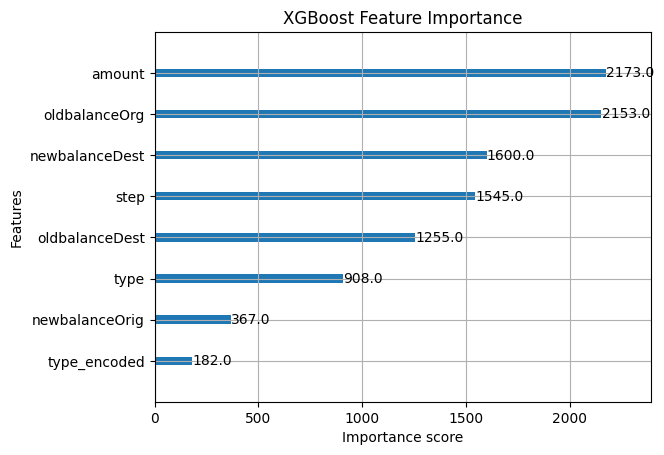

In [104]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10,6))
plot_importance(xgb_model, importance_type='weight')   # or 'gain' or 'cover'
plt.title("XGBoost Feature Importance")
plt.show()


## Note on Explainability:
#### While XGBoost’s built-in importance provides a global view of feature relevance, SHAP (SHapley Additive exPlanations) is often used for both global and local interpretability.
#### Due to file size and performance constraints, we did not compute SHAP on the full dataset. In practice, we would sample a subset (e.g., 1,000 rows) to visualize SHAP summary plots for a balance between insight and efficiency.

### Feature Correlation with Target

To understand which features are most strongly associated with fraud, we computed the **correlation between each numeric feature and the target variable (`isFraud`)**.  

- Positive correlation indicates that as the feature increases, the likelihood of fraud also increases.  
- Negative correlation indicates that as the feature increases, the likelihood of fraud decreases.  
- This provides a **quick and interpretable global view** of feature relevance without heavy computations.  

We visualize these correlations using a bar chart to easily identify the top predictors of fraudulent transactions.


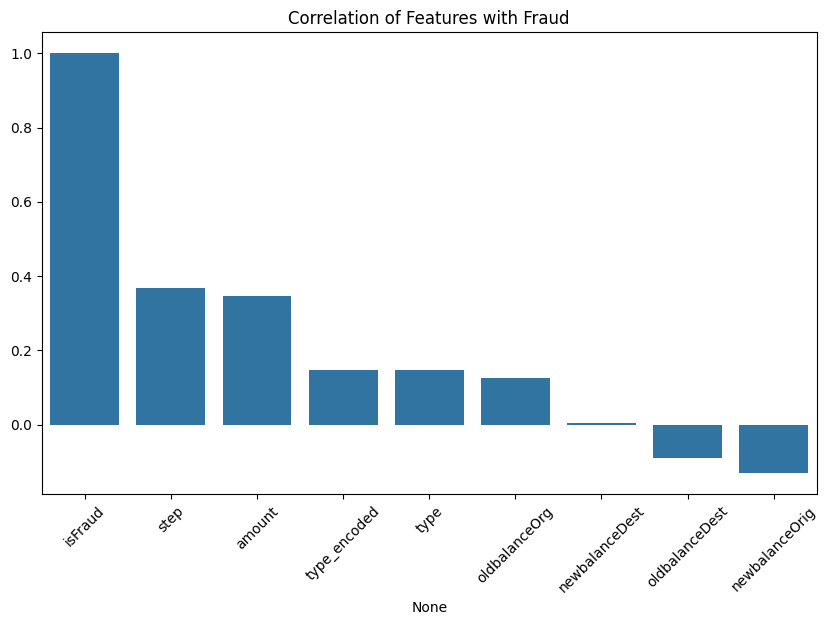

In [105]:
import seaborn as sns

# Only numeric features
corr = X_train_res.join(y_train_res).corr()['isFraud'].sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=corr.index, y=corr.values)
plt.xticks(rotation=45)
plt.title("Correlation of Features with Fraud")
plt.show()


### Partial Dependence Plots (PDP)

Partial Dependence Plots (PDPs) are used to visualize the effect of a single feature on the predicted probability of fraud, while averaging out the influence of other features.  

- PDPs help understand **how changes in a feature’s value impact model predictions**.  
- In `scikit-learn`, this can be implemented using the `PartialDependenceDisplay` function.  
- PDPs are particularly useful for the top 2–3 most important features, giving **intuitive insights** into model behavior without examining the entire dataset.  

This method provides a **lightweight and interpretable way** to explain the influence of individual features on the model's decision, complementing global feature importance measures.


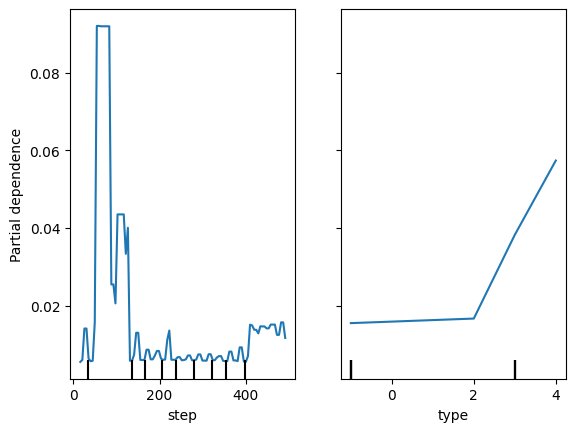

In [107]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(xgb_model, X_test, features=[0,1])  # top 2 features
plt.show()


### Interpretation of Key Predictors

Based on the model and feature importance analysis, the following factors are the strongest predictors of fraudulent transactions:

- **Transaction Amount (`amount`)**: Fraudulent transactions tend to involve unusually large amounts. This makes sense as fraudsters often try to maximize their gain in a single transaction.
- **Step / Time (`step`)**: Certain time periods may see more suspicious activity, such as unusual transaction patterns at odd hours.
- **Old and New Balances (`oldbalanceOrg`, `newbalanceOrig`, `oldbalanceDest`, `newbalanceDest`)**: Large or sudden changes in account balances often indicate fraudulent behavior, such as quickly transferring funds to another account.
- **Transaction Type (`type`)**: Types like `TRANSFER` and `CASH-OUT` are more frequently associated with fraud, which aligns with the business logic of how fraud is simulated in this dataset.

These factors make sense in the context of financial fraud, as they reflect both the behavior patterns of fraudsters and the structural rules of the payment system.


### Prevention Recommendations
- ### Implement real-time transaction monitoring with alerts for unusual patterns.
- ### Set thresholds for large transfers and sudden balance changes.
- ### Multi-factor authentication for account access and transfers.
- ### Periodic auditing and anomaly detection pipelines integrated with infrastructure updates.
- ### Educate employees and customers about phishing and social engineering attacks.


### Measuring Effectiveness
- ### Track **false negative rate** (undetected frauds) over time; aim to minimize it.
- ### Monitor **false positive rate** to ensure customer experience is not overly affected.
- ### Use metrics like ROC-AUC, precision, recall on new transaction data.
- ### Periodic review of flagged transactions by analysts to verify model predictions.
- ### Compare fraud losses before and after implementation to assess impact.
